In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import sys
# sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import csv
import seaborn as sns

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
path1 = f"../data/round_4/prices_round_4_day_1.csv"
path2 = f"../data/round_4/prices_round_4_day_2.csv"
path3 = f"../data/round_4/prices_round_4_day_3.csv"
results_path = f"../data/round_4/algo_data.csv"

In [3]:
data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)

In [6]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3,999700,COCONUT_COUPON,575.0,40.0,NaN,NaN,NaN,NaN,576,40,NaN,NaN,NaN,NaN,575.5,0.0
59996,3,999800,COCONUT_COUPON,575.0,30.0,NaN,NaN,NaN,NaN,576,44,NaN,NaN,NaN,NaN,575.5,0.0
59997,3,999800,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0
59998,3,999900,COCONUT_COUPON,575.0,43.0,NaN,NaN,NaN,NaN,576,43,NaN,NaN,NaN,NaN,575.5,0.0


In [7]:
def add_lags(parsed_data, col):
    lags = 3
    for i in range(1, lags + 1):
        parsed_data[f'lag{i}'] = parsed_data[col].shift(i)

    parsed_data.dropna(inplace=True)
    return parsed_data

In [11]:
coc_data = data[data["product"] == 'COCONUT']
coc_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
7,1,300,COCONUT,9999.0,149.0,9998.0,51.0,NaN,NaN,10000,149,10001.0,51.0,NaN,NaN,9999.5,0.0
8,1,400,COCONUT,9998.0,108.0,9997.0,63.0,NaN,NaN,9999,103,10000.0,63.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,3,999500,COCONUT,9883.0,141.0,9882.0,66.0,NaN,NaN,9884,141,9885.0,66.0,NaN,NaN,9883.5,0.0
59993,3,999600,COCONUT,9884.0,119.0,9883.0,75.0,NaN,NaN,9885,119,9886.0,75.0,NaN,NaN,9884.5,0.0
59994,3,999700,COCONUT,9883.0,115.0,9882.0,53.0,NaN,NaN,9884,115,9885.0,53.0,NaN,NaN,9883.5,0.0
59997,3,999800,COCONUT,9883.0,127.0,9882.0,46.0,NaN,NaN,9885,164,NaN,NaN,NaN,NaN,9884.0,0.0


In [12]:
coc_data_mid = coc_data[["mid_price"]]
coc_data_mid

,mid_price
0,10000.0
2,9999.5
4,9998.5
7,9999.5
8,9998.5
...,...
59991,9883.5
59993,9884.5
59994,9883.5
59997,9884.0


In [13]:
coc_data_mid = add_lags(coc_data_mid, "mid_price")
coc_data_mid

C:\Users\HP\AppData\Local\Temp\ipykernel_14904\411776612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_data[f'lag{i}'] = parsed_data[col].shift(i)
c:\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,mid_price,lag1,lag2,lag3
7,9999.5,9998.5,9999.5,10000.0
8,9998.5,9999.5,9998.5,9999.5
10,9996.5,9998.5,9999.5,9998.5
12,9997.0,9996.5,9998.5,9999.5
15,9998.0,9997.0,9996.5,9998.5
...,...,...,...,...
59991,9883.5,9884.0,9883.5,9883.5
59993,9884.5,9883.5,9884.0,9883.5
59994,9883.5,9884.5,9883.5,9884.0
59997,9884.0,9883.5,9884.5,9883.5


In [14]:
x_coc = coc_data_mid[["lag1", "lag2", "lag3"]]
x_coc

,lag1,lag2,lag3
7,9998.5,9999.5,10000.0
8,9999.5,9998.5,9999.5
10,9998.5,9999.5,9998.5
12,9996.5,9998.5,9999.5
15,9997.0,9996.5,9998.5
...,...,...,...
59991,9884.0,9883.5,9883.5
59993,9883.5,9884.0,9883.5
59994,9884.5,9883.5,9884.0
59997,9883.5,9884.5,9883.5


In [15]:
y_coc = coc_data_mid["mid_price"]
y_coc

7        9999.5
8        9998.5
10       9996.5
12       9997.0
15       9998.0
          ...  
59991    9883.5
59993    9884.5
59994    9883.5
59997    9884.0
59999    9882.5
Name: mid_price, Length: 29997, dtype: float64

In [16]:
model = LinearRegression()
model.fit(x_coc, y_coc)
pred_coc = model.predict(x_coc)
coc_data_mid["pred"] = pred_coc
coc_data_mid

C:\Users\HP\AppData\Local\Temp\ipykernel_14904\4254189107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coc_data_mid["pred"] = pred_coc


,mid_price,lag1,lag2,lag3,pred
7,9999.5,9998.5,9999.5,10000.0,9998.524656
8,9998.5,9999.5,9998.5,9999.5,9999.458558
10,9996.5,9998.5,9999.5,9998.5,9998.533576
12,9997.0,9996.5,9998.5,9999.5,9996.553298
15,9998.0,9997.0,9996.5,9998.5,9996.968472
...,...,...,...,...,...
59991,9883.5,9884.0,9883.5,9883.5,9883.984392
59993,9884.5,9883.5,9884.0,9883.5,9883.518927
59994,9883.5,9884.5,9883.5,9884.0,9884.465628
59997,9884.0,9883.5,9884.5,9883.5,9883.537673


In [17]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Accuracy:", model.score(x_coc, y_coc))

Coefficients: [ 0.96842006  0.03749103 -0.00594672]
Intercept: 0.35228277771784633
Accuracy: 0.9998656301606897


In [21]:
data_AMETHYSTS = prices.loc[prices['product']=='AMETHYSTS'][['mid_price']].rename(columns={'mid_price': 'AMETHYSTS'})
data_STARFRUIT = prices.loc[prices['product']=='STARFRUIT'][['mid_price']].rename(columns={'mid_price': 'STARFRUIT'})
data_COCONUTS = prices.loc[prices['product']=='COCONUT'][['mid_price']].rename(columns={'mid_price': 'COCONUT'})
data_COCO_COUPONS = prices.loc[prices['product']=='COCONUT_COUPON'][['mid_price']].rename(columns={'mid_price': 'COCO_COUPON'})
data_CHOCOLATE = prices.loc[prices['product']=='CHOCOLATE'][['mid_price']].rename(columns={'mid_price': 'CHOCOLATE'})
data_STRAWBERRIES = prices.loc[prices['product']=='STRAWBERRIES'][['mid_price']].rename(columns={'mid_price': 'STRAWBERRIES'})
data_GIFT_BASKETS = prices.loc[prices['product']=='GIFT_BASKET'][['mid_price']].rename(columns={'mid_price': 'GIFT_BASKET'})
data_ROSES = prices.loc[prices['product']=='ROSES'][['mid_price']].rename(columns={'mid_price': 'ROSES'})
prices = pd.concat([data_AMETHYSTS, data_STARFRUIT, data_COCONUTS, data_COCO_COUPONS, data_CHOCOLATE, data_STRAWBERRIES, data_GIFT_BASKETS, data_ROSES], axis=1)
prices.columns = pd.MultiIndex.from_product([['mid_price'], prices.columns.tolist()])
prices

mid_price                                                       \
          AMETHYSTS STARFRUIT COCONUT COCO_COUPON CHOCOLATE STRAWBERRIES   
timestamp                                                                  
200          9997.0    5005.0  9990.5       620.5    7751.5       3985.0   
300         10000.0    5005.0  9991.5       621.5    7750.5       3984.5   
400         10000.0    5006.5  9990.0       621.5    7749.5       3985.0   
500         10003.5    5003.5  9988.5       620.5    7749.5       3984.5   
600         10000.0    5003.5  9986.5       619.0    7750.5       3984.5   
...             ...       ...     ...         ...       ...          ...   
99500       10003.5    4981.0  9961.0       597.5    7765.5       3966.5   
99600       10002.0    4982.0  9960.5       596.5    7766.5       3966.0   
99700       10000.0    4980.5  9962.5       595.5    7765.5       3966.0   
99800       10001.0    4980.0  9963.5       597.5    7765.5       3966.0   
99900       10001.0    4980.0  9962.0       597.5    7767.0       3967.5   

                                
          GIFT_BASKET    ROSES  
timestamp                       
200           69558.0  14421.0  
300           69551.5  14423.0  
400           69547.5  14426.0  
500           69545.5  14425.5  
600           69546.0  14425.0  
...               ...      ...  
99500         69429.5  14263.5  
99600         69435.5  14262.5  
99700         69434.5  14265.5  
99800         69438.5  14266.5  
99900         69445.5  14264.5  

[998 rows x 8 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

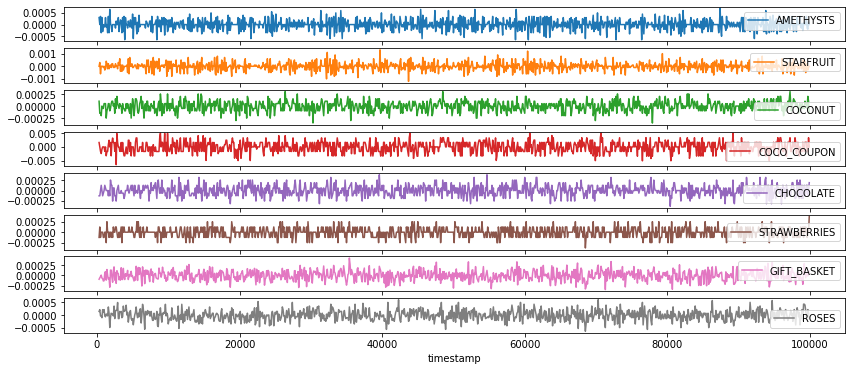

In [22]:
returns = np.log(prices['mid_price']/ prices['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

array([[<Axes: xlabel='AMETHYSTS', ylabel='AMETHYSTS'>,
        <Axes: xlabel='STARFRUIT', ylabel='AMETHYSTS'>,
        <Axes: xlabel='COCONUT', ylabel='AMETHYSTS'>,
        <Axes: xlabel='COCO_COUPON', ylabel='AMETHYSTS'>,
        <Axes: xlabel='CHOCOLATE', ylabel='AMETHYSTS'>,
        <Axes: xlabel='STRAWBERRIES', ylabel='AMETHYSTS'>,
        <Axes: xlabel='GIFT_BASKET', ylabel='AMETHYSTS'>,
        <Axes: xlabel='ROSES', ylabel='AMETHYSTS'>],
       [<Axes: xlabel='AMETHYSTS', ylabel='STARFRUIT'>,
        <Axes: xlabel='STARFRUIT', ylabel='STARFRUIT'>,
        <Axes: xlabel='COCONUT', ylabel='STARFRUIT'>,
        <Axes: xlabel='COCO_COUPON', ylabel='STARFRUIT'>,
        <Axes: xlabel='CHOCOLATE', ylabel='STARFRUIT'>,
        <Axes: xlabel='STRAWBERRIES', ylabel='STARFRUIT'>,
        <Axes: xlabel='GIFT_BASKET', ylabel='STARFRUIT'>,
        <Axes: xlabel='ROSES', ylabel='STARFRUIT'>],
       [<Axes: xlabel='AMETHYSTS', ylabel='COCONUT'>,
        <Axes: xlabel='STARFRUIT', ylabel='COC

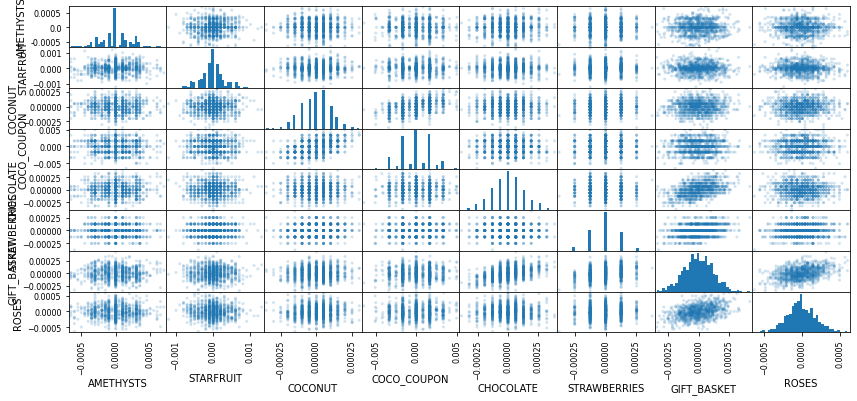

In [23]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

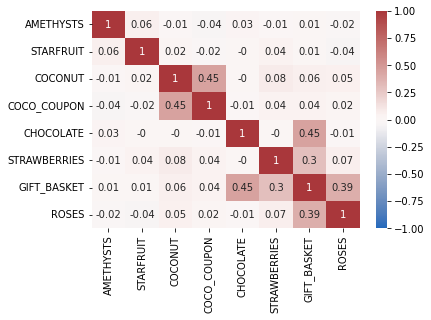

In [24]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

In [25]:
plt.rcParams["figure.figsize"] = (15,5)

In [35]:
d1 = pd.read_csv('.././data/round_4/prices_round_4_day_1.csv', sep=';')
d2 = pd.read_csv('.././data/round_4/prices_round_4_day_2.csv', sep=';')
d3 = pd.read_csv('.././data/round_4/prices_round_4_day_3.csv', sep=';')

pricedata = pd.concat([d1, d2, d3]).fillna(0)

In [37]:
pricedata

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,0.0,0.0,0.0,0.0,10001,200,0.0,0.0,0.0,0.0,10000.0,0.0
1,1,0,COCONUT_COUPON,637.0,39.0,0.0,0.0,0.0,0.0,638,39,0.0,0.0,0.0,0.0,637.5,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,0.0,0.0,10000,104,10001.0,44.0,0.0,0.0,9999.5,0.0
3,1,100,COCONUT_COUPON,637.0,33.0,0.0,0.0,0.0,0.0,638,33,0.0,0.0,0.0,0.0,637.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,0.0,0.0,9999,133,10000.0,62.0,0.0,0.0,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,999700,COCONUT_COUPON,575.0,40.0,0.0,0.0,0.0,0.0,576,40,0.0,0.0,0.0,0.0,575.5,0.0
19996,3,999800,COCONUT_COUPON,575.0,30.0,0.0,0.0,0.0,0.0,576,44,0.0,0.0,0.0,0.0,575.5,0.0
19997,3,999800,COCONUT,9883.0,127.0,9882.0,46.0,0.0,0.0,9885,164,0.0,0.0,0.0,0.0,9884.0,0.0
19998,3,999900,COCONUT_COUPON,575.0,43.0,0.0,0.0,0.0,0.0,576,43,0.0,0.0,0.0,0.0,575.5,0.0


In [58]:
coco = pricedata[pricedata['product'] == 'COCONUT']
coupon = pricedata[pricedata['product'] == 'COCONUT_COUPON']
coco

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999.0,200.0,0.0,0.0,0.0,0.0,10001,200,0.0,0.0,0.0,0.0,10000.0,0.0
2,1,100,COCONUT,9999.0,104.0,9998.0,44.0,0.0,0.0,10000,104,10001.0,44.0,0.0,0.0,9999.5,0.0
4,1,200,COCONUT,9998.0,133.0,9997.0,62.0,0.0,0.0,9999,133,10000.0,62.0,0.0,0.0,9998.5,0.0
7,1,300,COCONUT,9999.0,149.0,9998.0,51.0,0.0,0.0,10000,149,10001.0,51.0,0.0,0.0,9999.5,0.0
8,1,400,COCONUT,9998.0,108.0,9997.0,63.0,0.0,0.0,9999,103,10000.0,63.0,0.0,0.0,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,3,999500,COCONUT,9883.0,141.0,9882.0,66.0,0.0,0.0,9884,141,9885.0,66.0,0.0,0.0,9883.5,0.0
19993,3,999600,COCONUT,9884.0,119.0,9883.0,75.0,0.0,0.0,9885,119,9886.0,75.0,0.0,0.0,9884.5,0.0
19994,3,999700,COCONUT,9883.0,115.0,9882.0,53.0,0.0,0.0,9884,115,9885.0,53.0,0.0,0.0,9883.5,0.0
19997,3,999800,COCONUT,9883.0,127.0,9882.0,46.0,0.0,0.0,9885,164,0.0,0.0,0.0,0.0,9884.0,0.0


In [49]:
x100 = np.arange(0, 3000000, 100)

In [52]:
cocomean = np.mean(coco['mid_price'])
couponmean = np.mean(coupon['mid_price'])

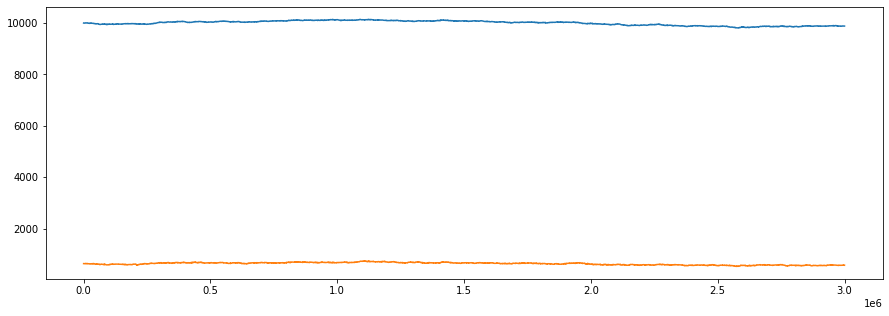

In [53]:
plt.plot(x100, coco['mid_price'])
plt.plot(x100, coupon['mid_price'])
plt.show()

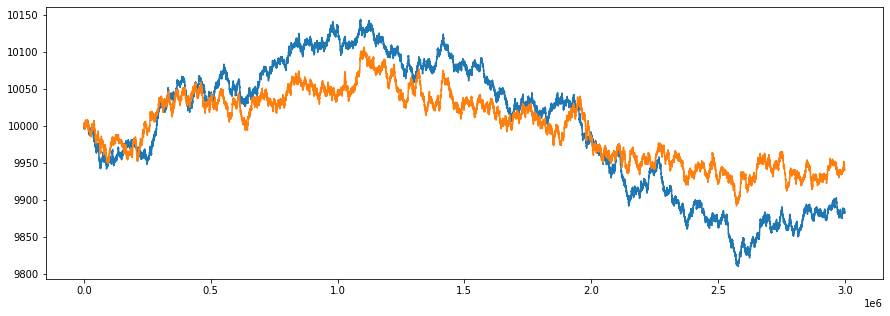

In [55]:
closecomparison = coupon['mid_price'] + cocomean - couponmean
plt.plot(x100, coco['mid_price'])
plt.plot(x100, closecomparison)

In [42]:
ratio = coco['mid_price'].to_numpy()/coupon['mid_price']

In [43]:
np.mean(ratio)

15.823123638481231

In [44]:
np.std(ratio)

1.0435813987717617

In [45]:
np.max(ratio)

18.607582938388624

In [46]:
np.min(ratio)

13.659474039109913

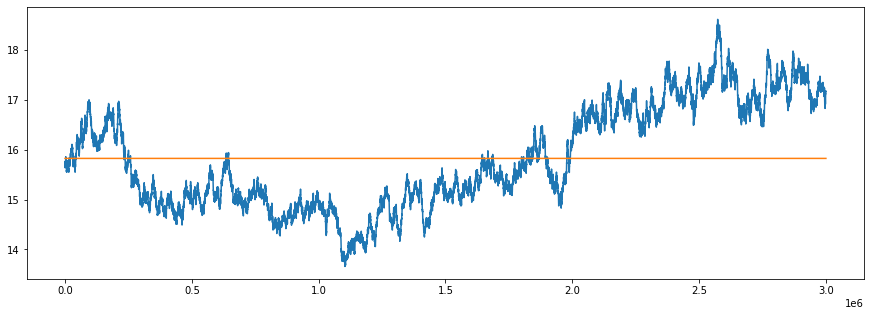

In [48]:
plt.plot(x100, ratio)
plt.plot(x100, np.mean(ratio) * np.ones(30000))
plt.show()

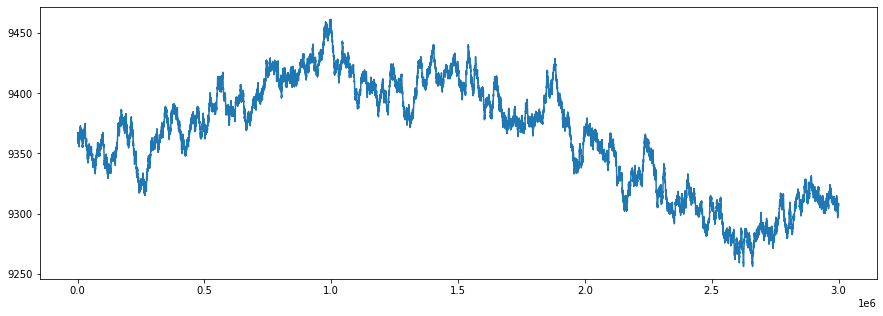

In [59]:
diff = coco['mid_price'].to_numpy() - coupon['mid_price']
plt.plot(x100, diff)

In [60]:
np.mean(diff)

9364.85455

In [61]:
np.std(diff)

46.107113001114044